In [1]:
import os, sys 
sys.path.append('../../gempy/')

In [2]:
import gempy as gp

In [3]:
# Import improved plotting features
from gempy.plot import visualization_2d_pro as vv
from gempy.plot import vista

Active grids: ['regular']
Active grids: ['regular' 'topography']


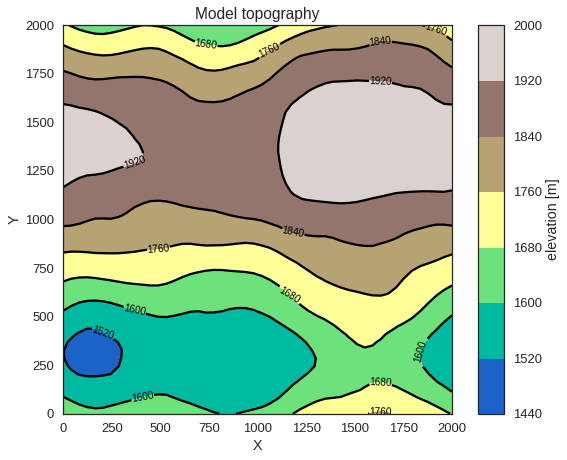

In [4]:
data_path= '../../gempy/notebooks/'
geo_model = gp.create_model('test_topo')

gp.init_data(geo_model, [0,2000.,0,2000.,0,2000.],[50,50,50], 
      path_o = data_path+"/data/input_data/tut_chapter1/simple_fault_model_orientations.csv",
      path_i = data_path+"/data/input_data/tut_chapter1/simple_fault_model_points.csv", default_values=True)
geo_model.set_topography(source='random',fd=1, d_z=np.array([1500,2000]));

In [5]:
# set 3 sections which go North South
section_dict = {'section_SW-NE':([250,500],[1750,1750],[100,100]),
                 'section_NW-SE':([250,1750],[1750,250],[100,100])} 
geo_model.set_section_grid(section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
section_SW-NE,"[250, 500]","[1750, 1750]","[100, 100]",1952.562419
section_NW-SE,"[250, 1750]","[1750, 250]","[100, 100]",2121.320344


In [6]:
gp.map_series_to_surfaces(geo_model,
                          {"Fault_Series":'Main_Fault', 
                             "Strat_Series": ('Sandstone_2','Siltstone',
                                              'Shale', 'Sandstone_1', 'basement')}, remove_unused_series=True);

In [7]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False


In [8]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])
sol = gp.compute_model(geo_model, compute_mesh=True, sort_surfaces=False)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                  values
range            3464.1
$C_o$            285714
drift equations  [3, 3]


../../gempy/gempy/core/solution.py:288: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


In [40]:
sec_name = 'section_SW-NE'

In [41]:
p1 = geo_model.grid.sections.df.loc[sec_name, 'start']
p2 = geo_model.grid.sections.df.loc[sec_name, 'stop']

res = geo_model.grid.regular_grid.resolution[0]

In [42]:
p = gp._plot.plot_2d(geo_model, show_data=False)
test_slice = gp._plot.Plot2D._slice_topo_4_sections(p, p1, p2, res)

<Figure size 748.8x514.8 with 0 Axes>

In [43]:
a = p.add_section(sec_name)
p.plot_lith(a, sec_name)
p.plot_topography(a, sec_name)

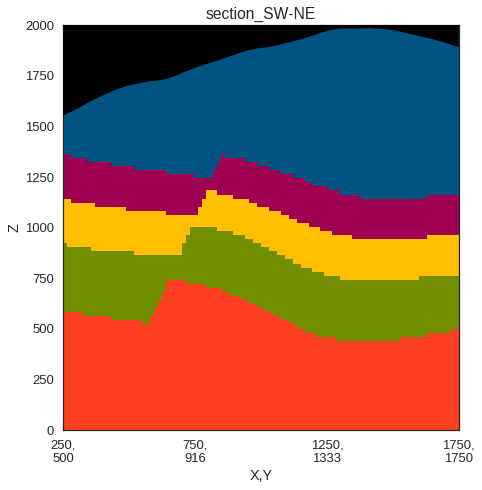

In [44]:
p.fig

In [14]:
xy = geo_model.grid.sections.calculate_line_coordinates_2points(p1, p2, res)

In [15]:
from scipy import interpolate

In [16]:
val3d = geo_model.grid.topography.values_3D

In [23]:
def interpolate_zvals_at_xy(values_3D, xy):
    assert xy[:, 0][0] <= xy[:, 0][-1], 'At the moment, the xy values of the first point must be smaller than second' \
                                        '(fix soon)'
    assert xy[:, 1][0] <= xy[:, 1][-1], 'At the moment, the xy values of the first point must be smaller than second' \
                                        '(fix soon)'
    xj = values_3D[:, :, 0][0, :]
    yj = values_3D[:, :, 1][:, 0]
    zj = values_3D[:, :, 2].T

    f = interpolate.RectBivariateSpline(xj, yj, zj)
    zi = f(xy[:, 0], xy[:, 1])
    return np.diag(zi)

def interpolate_zvals_at_xy_new(values_3D, xy):
    #assert xy[:, 0][0] <= xy[:, 0][-1], 'At the moment, the xy values of the first point must be smaller than second' \
    #                                    '(fix soon)'
    #assert xy[:, 1][0] <= xy[:, 1][-1], 'At the moment, the xy values of the first point must be smaller than second' \
    #                                    '(fix soon)'
    xj = values_3D[:, :, 0][0, :]
    yj = values_3D[:, :, 1][:, 0]
    zj = values_3D[:, :, 2]
    f = interpolate.interp2d(xj, yj, zj)
    zi = f(xy[:, 0], xy[:, 1])
    return np.diag(zi)

In [28]:
old_version = interpolate_zvals_at_xy(val3d, xy)

In [29]:
new_version = interpolate_zvals_at_xy_new(val3d, xy)

In [30]:
new_version - old_version

array([ 0.06993052,  0.4565454 ,  0.33780979,  0.06730677,  0.01390662,
        0.03447977, -0.13532223, -0.47756568, -0.28780175, -0.34866525,
       -0.41408008, -0.07198389,  0.16367365,  0.63979129,  0.21687859,
       -0.62725634, -0.3882672 , -0.52956644, -0.62251465, -0.16010454,
       -0.18467258,  0.09697285, -0.19918735, -0.60195749, -0.16920248,
        0.08191608,  0.72474425,  0.27121854, -0.00095302, -0.07165878,
        0.2664649 ,  0.03992868, -0.67369067, -0.0658189 , -0.87610838,
       -0.32940417,  0.06345922, -0.09320731, -0.56029544, -0.43820495,
       -0.77770932, -0.35601557, -0.21621026,  0.03220837,  0.10440816,
       -0.07226853, -0.13196035, -0.2571941 ,  0.26683853,  0.39537776])

In [45]:
sec2_name = 'section_NW-SE'

In [46]:
p1 = geo_model.grid.sections.df.loc[sec2_name, 'start']
p2 = geo_model.grid.sections.df.loc[sec2_name, 'stop']

res = geo_model.grid.regular_grid.resolution[0]

In [47]:
xy = geo_model.grid.sections.calculate_line_coordinates_2points(p1, p2, res)

In [48]:
val3d = geo_model.grid.topography.values_3D

In [49]:
old_version2 = interpolate_zvals_at_xy(val3d, xy)

AssertionError: At the moment, the xy values of the first point must be smaller than second(fix soon)

In [50]:
new_version2 = interpolate_zvals_at_xy_new(val3d, xy)

In [82]:
new_version2

array([1512.86731522, 1514.45232809, 1519.60285654, 1525.17014048,
       1533.42625284, 1545.46000005, 1560.2212551 , 1576.31264738,
       1593.29941533, 1607.7199986 , 1618.73017606, 1627.5197277 ,
       1635.16790716, 1643.66470656, 1654.31777077, 1666.12123402,
       1679.18817836, 1695.54103719, 1715.05771326, 1734.83526609,
       1752.6837614 , 1770.81663569, 1791.26289075, 1812.33235327,
       1831.83311296, 1850.86345636, 1867.3805707 , 1881.38551948,
       1895.98959148, 1911.34758844, 1925.71400495, 1938.47612979,
       1951.29980426, 1965.53692127, 1978.79465221, 1988.19357704,
       1991.81773458, 1991.09433078, 1989.61209145, 1987.48931666,
       1984.22164575, 1980.85968266, 1974.89080475, 1964.3670408 ,
       1953.83729968, 1942.98542748, 1931.50888596, 1918.71016617,
       1904.37472303, 1891.41622193])

In [80]:
geo_model.grid.topography.values_3D[6,43,2]

1641.990863869898

29.949735242901397


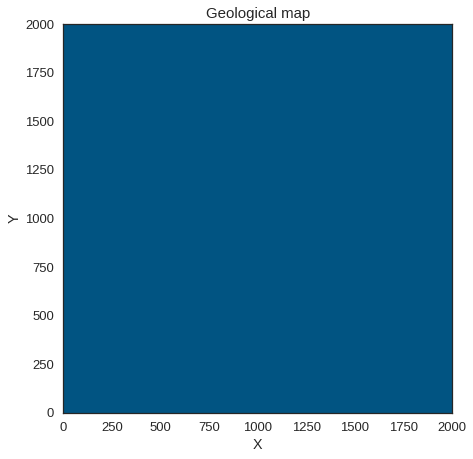

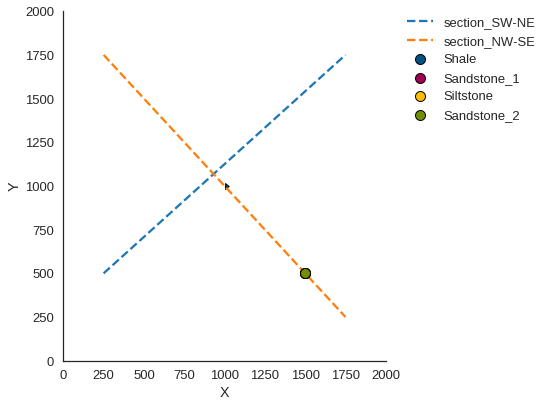

In [53]:
gp.plot.plot_section_traces(geo_model)